In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """
    
    Parameters
    ------------
    eta : float
     Learning rate (between 0.0 and 1.0)
    n_iter : int
     Passes over the training dataset (epoch)
    random_state : int
     Random number generator seed for random weight
     initialization
     
    Attributes
    -------------
    w_ : 1d-array
     Weights after fitting.
    errors_ : list
     Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        --------------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of
          samples and
          n_features is the number of featrues.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        #The reason we used a normal distribution and a standard diviation
        #of 0.01 was completely arbitrary.
    
    def net_input(self, X):
        """Calculate input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return clss label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
#v1 = np.array([1,2,3])
#v2 = 0.5 * v1
#np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
#Compute the angle between vectors v1 and v2 where v2 is half of v1
#norm computews the length of a vector

In [4]:
#We will use the pandas library to load the Iris dataset firectly from UCI Machine Learning Repo into a DataFrame
#Object and print the last five lines via the tail method to check that the data is loaded correctly

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)
#If working offline we can load the data locally like so
#df = pd.read_csv('your/local/path/to/data', header=None)

In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#Next we are going to etract the first 100 class labels that correspond to the 50 Urus-setosa and Iris-Versicolor
#flowers, and convert the classlabels into two integer class labels 1 (verisicolor) and -1(setosa) that we assign
#to a vector y, where the values method of a pandas DataFrame yields the corresponding NumPy representation

#Similarly, we extract the first feature column (sepal length) and the third feature column (petal length) of those
#100 training samples and assign them to a feature matrix X, which we can visualize via a two dimensional scatter
#plot

In [9]:
import matplotlib.pyplot as plt

In [10]:
#Select setosa and versicolor
y = df.iloc[0:100, 4].values #First 100 entries of column 4
y = np.where(y == 'Iris-setosa', -1, 1)

In [11]:
#extract sepal length and petal length 
X = df.iloc[0:100, [0,2]].values

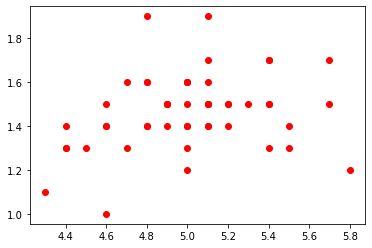

In [12]:
#plot data
plt.scatter(X[:50,0], X[:50, 1],
            color='red', marker='o', label='setosa')

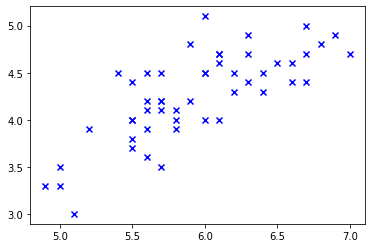

In [13]:
plt.scatter(X[50:100,0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

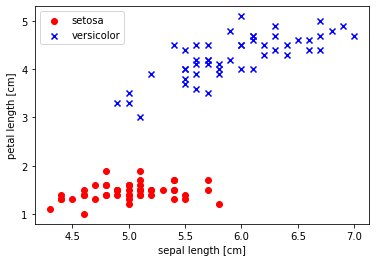

In [14]:
#plotting in the same graph
plt.scatter(X[:50,0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [15]:
#From the graph we can see that a linear classifier such as the perceptron should e able to classigy the 
#flowers in this dataset perfectly as the feature subspace is linearly separable.

In [16]:
#Now, it's time to train our perceptron algorithm on the iris data subset that we just extracted. Also, we will plot
#the misclassification error for each epoch to check whether the algorithm onverged and found a decision boundary
#that separates the two Iris flower classes:

In [17]:
ppn = Perceptron(eta=0.1,n_iter=10)

In [18]:
ppn.fit(X,y)

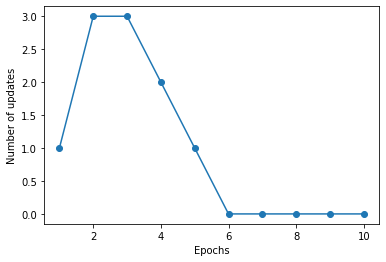

In [19]:
plt.plot(range(1,len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [20]:
print(ppn.errors_)

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


In [21]:
#We can see that our perceptron converged after the sixth epoch and should now be able to classify the training
#samples perfectly.

In [22]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [23]:
#we can see our two classes represented as -1 and 1

In [24]:
#We are going to implement a convenience function to visualize the decision boundaries for a two-dimensional dataset

In [25]:
from matplotlib.colors import ListedColormap

In [33]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')
    #idx will be a counter i.e first element is 0, second element is 1
    #cl will contain the unique element of y

In [34]:
#let us draw plot

/var/folders/66/vq3ykjx95j994mj5vw0jc58m0000gn/T/ipykernel_78667/3132478291.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


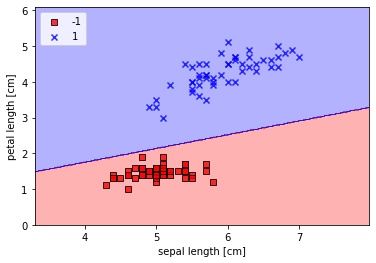

In [35]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()